In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
# Importing the data    

df = pd.read_csv('bengaluru_House_Data.csv', encoding='ISO-8859-1')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
for i in df.columns:
    print(i, ':')
    print(df[i].unique(), '\n')

area_type :
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 

availability :
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] 

location :
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur e

# Data Cleaning
- First of all revoming all the whitespace in column name and in the values of the column

In [7]:
# Strip whitespace from column names
df.columns = [col.strip() for col in df.columns]

# Strip leading and trailing whitespace from string values in each column
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Checking for Null Values

In [8]:
null_val = df.isnull().sum()
null_val = pd.DataFrame(null_val)
null_val['percent'] = round((null_val/df.shape[0])*100,2)
null_val.sort_values('percent',ascending=False)

,0,percent
society,5502,41.31
balcony,609,4.57
bath,73,0.55
size,16,0.12
location,1,0.01
area_type,0,0.00
availability,0,0.00
total_sqft,0,0.00
price,0,0.00


There are features with null values location, size, bath, balcony and society.
- As there is 41% null values present in the society column so it is better to drop this as we also have location feature available 
- And for rest we can treat them

In [9]:
# Droping the society column
df.drop(columns='society', inplace = True)

# Treating the null values in Size Column

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['size'].isnull().sum()

16

16 values are missing from the size column it is safe to drop these rows

In [12]:
df.dropna(subset=['size'], inplace=True)
df['size'].isnull().sum()

0

As there are different values in Size column BHK, Bedroom, Rk So converting all in sting to "BHK"

In [13]:
# Converting all alphabets in string to 'BHK'
def BHK(x):
    i = str(x)
    if i.endswith('Bedroom'):
        return i.replace('Bedroom', 'BHK')
    elif i.endswith('RK'):
        return i.replace('RK', 'BHK')
    else:
        return x

df['size'] = df['size'].apply(lambda x: BHK(x))
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,$51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488


In [14]:
# converting the old column 'size' to new numeric column 'BHK'
df['BHK']=df['size'].str.split().apply(lambda x: x[0])
df['BHK'] = pd.to_numeric(df['BHK'], errors='coerce')


# Dropping the column 'size' since not required anymore
df.drop('size',axis=1,inplace=True)

In [15]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,$39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,$120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,$62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,$95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,$51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231,5
13316,Super built-up Area,Ready To Move,Richards Town,3600,5.0,NaN,400,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689,4.0,1.0,488,4


# Treating the null values in Location Column

In [16]:
df[df.location.isnull()]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
568,Super built-up Area,Ready To Move,NaN,1600,3.0,2.0,86,3


- We can use mode to fill this missing value

In [17]:
mode_location = df['location'].mode()[0]
df['location'] = df['location'].fillna(mode_location)

In [18]:
df[df.location.isnull()]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK


In [19]:
for i in df.location.unique():
    print(i)

Electronic City Phase II
Chikka Tirupathi
Uttarahalli
Lingadheeranahalli
Kothanur
Whitefield
Old Airport Road
Rajaji Nagar
Marathahalli
Gandhi Bazar
7th Phase JP Nagar
Gottigere
Sarjapur
Mysore Road
Bisuvanahalli
Raja Rajeshwari Nagar
Ramakrishnappa Layout
Manayata Tech Park
Kengeri
Binny Pete
Thanisandra
Bellandur
Mangammanapalya
Electronic City
Ramagondanahalli
Yelahanka
Hebbal
Kasturi Nagar
Kanakpura Road
Electronics City Phase 1
Kundalahalli
Chikkalasandra
Murugeshpalya
Sarjapur  Road
Ganga Nagar
HSR Layout
Doddathoguru
KR Puram
Himagiri Meadows
Adarsh Nagar
Bhoganhalli
Lakshminarayana Pura
Begur Road
Devanahalli
Govindaraja Nagar Ward
Tharabanahalli
Varthur
Bommanahalli
Gunjur
Devarachikkanahalli
Double Road
Hegde Nagar
Haralur Road
Hennur Road
Kothannur
Kalena Agrahara
Cholanayakanahalli
Kaval Byrasandra
ISRO Layout
Kodanda Reddy Layout
Garudachar Palya
EPIP Zone
Dasanapura
Kasavanhalli
Sanjay nagar
Mysore Highway
Domlur
Sarjapura - Attibele Road
Devasthanagalu
T Dasarahalli
Yesh

In [20]:
location_count = df.location.value_counts(ascending=False)
location_count

Whitefield                        541
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [21]:
df.location.nunique()

1293

In [22]:
len(location_count[location_count > 10])

241

In [23]:
len(location_count[location_count <= 10])

1052

As we can see there are 1293 unique values in location which will create problem when we apply dummies Hence applying the dimensionality reduction technique to reduce the number of locations
- Any location having less than 10 or equal to 10 data points will considered as 'OTHER' location. This way number of categories can be reduced by huge amount.
later on when we use one hot encoding, it will help us having fewer dummy columns

In [24]:
location_count_10 = location_count[location_count <= 10]

df['location'] = df['location'].apply(lambda x: 'Other' if x in location_count_10 else x)

In [25]:
df['location'].value_counts()

Other                 2882
Whitefield             541
Sarjapur  Road         397
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

# Treating Null Values in 'balcony'

In [26]:
df.balcony.isnull().sum()

593

In [27]:
df_bal = df.pivot_table(values='balcony',index='area_type', aggfunc=np.median)
df_bal

,balcony
area_type,
Built-up Area,1.0
Carpet Area,1.0
Plot Area,1.0
Super built-up Area,2.0


In [28]:
null_bal = df.balcony.isnull()

df.loc[null_bal, 'balcony']= df.loc[null_bal,'area_type'].apply(lambda x: df_bal.loc[x])

# Treating Null Values in 'balcony'

In [29]:
df.bath.isnull().sum()

57

In [30]:
df_bath=df.pivot_table(values='bath',index='area_type',aggfunc=np.median)
df_bath

,bath
area_type,
Built-up Area,2.0
Carpet Area,2.0
Plot Area,4.0
Super built-up Area,2.0


In [31]:
null_bath = df.bath.isnull()

df.loc[null_bath, 'bath']= df.loc[null_bath,'area_type'].apply(lambda x: df_bath.loc[x])

In [32]:
df.bath.isnull().sum()

0

# Checking availability Feature

In [33]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

As we can see there are different dates for the property to be available and some are ready to move
So we can convert all the dates to 'Will Be Available' and "Ready To Move' in 'availability' column

In [34]:
def available_or_not(x):
    if x == 'Ready To Move':
        return x
    else:
        x = 'Will Be Available'
        return x

In [35]:
df['availability']=df['availability'].apply(lambda x: available_or_not(x))
df.availability.unique()

array(['Will Be Available', 'Ready To Move'], dtype=object)

In [36]:
# Replacing the unique values to 0 and 1 in 'availability' columns

df['availability']=df['availability'].map({'Will Be Available': 0, 'Ready To Move': 1})

df.availability.unique()

array([0, 1], dtype=int64)

In [37]:
df.describe()

,availability,bath,balcony,BHK
count,13304.000000,13304.000000,13304.000000,13304.000000
mean,0.795325,2.689642,1.581479,2.803743
std,0.403479,1.339345,0.805887,1.294974
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000
50%,1.000000,2.000000,2.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000
max,1.000000,40.000000,3.000000,43.000000


# Checking Price Feature
As price is our Target feature first will clean price feature 
- First need to remove the special characters or non numeric characters in the price column 
- Need to convert it into Float data type

In [38]:
# Checking the Price column is there any special characters
import re

special_chars_pattern = r'[~`!@#$%^&*()\-_=+\[\]{}:;\'",<.>/?\\]'

# Find and print the specific special characters present in the 'price' column
special_chars_found = set()

for i in df['price']:
    special_chars = re.findall(special_chars_pattern, i)
    special_chars_found.update(special_chars)

if special_chars_found:
    print("Special characters found in the price column:", special_chars_found)
else:
    print("No special characters found in the price column.")

Special characters found in the price column: {'-', '$', '.', '?'}


In [39]:
filtered_df = df[df['price'].str.contains('[?$-]', regex=True)]
filtered_df.head(30)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,0,Electronic City Phase II,1056,2.0,1.0,$39.07,2
1,Plot Area,1,Chikka Tirupathi,2600,5.0,3.0,$120.00,4
2,Built-up Area,1,Uttarahalli,1440,2.0,3.0,$62.00,3
3,Super built-up Area,1,Lingadheeranahalli,1521,3.0,1.0,$95.00,3
4,Super built-up Area,1,Kothanur,1200,2.0,1.0,$51.00,2
5,Super built-up Area,1,Whitefield,1170,2.0,1.0,$38.00,2
6,Super built-up Area,0,Old Airport Road,2732,4.0,2.0,$204.00,4
7,Super built-up Area,1,Rajaji Nagar,3300,4.0,2.0,$600.00,4
8,Super built-up Area,1,Marathahalli,1310,3.0,1.0,$63.25,3
9,Plot Area,1,Other,1020,6.0,1.0,$370.00,6


In [40]:
# Revoming the special Character in the price column

df['price'] = df['price'].apply(lambda x: re.sub(r'[^0-9\-.]', '', x))  # Remove non-numeric characters except '-'

In [41]:
# Price Column should be numeric
def range_converter(x):
    if isinstance(x, str):  # Check if x is a string
        new = x.split('-')
        if len(new) == 2:
            return (float(new[0]) + float(new[1])) / 2
        try:
            return float(x)
        except:
            return x
    else:
        return x  # Return the input if it's already a float

df['price'] = df['price'].apply(range_converter)
df['price'] = df['price'].astype('float64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  int64  
 2   location      13304 non-null  object 
 3   total_sqft    13304 non-null  object 
 4   bath          13304 non-null  float64
 5   balcony       13304 non-null  float64
 6   price         13304 non-null  float64
 7   BHK           13304 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 935.4+ KB


# Checking Total Sqft Feature

In [43]:
for i in df.total_sqft.unique():
    print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1520 - 1740
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
30

In [44]:
special_chars_pattern = r'[~`!@#$%^&*()\-_=+\[\]{}:;\'",<.>/?]'

# Find and print the specific special characters present in the 'price' column
special_chars_found = set()

for i in df['total_sqft']:
    special_chars = re.findall(special_chars_pattern, i)
    special_chars_found.update(special_chars)

if special_chars_found:
    print("Special characters found in the total_sqft column:", special_chars_found)
else:
    print("No special characters found in the total_sqft column.")

Special characters found in the total_sqft column: {'-', '.'}


In [45]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df_tsqft = df.total_sqft.apply(is_float)
df_tsqft.value_counts()

True     13065
False      239
Name: total_sqft, dtype: int64

In [46]:
# Extracting data which is not float in Total Sqft

df[~df['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,0,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,0,Devanahalli,3010 - 3410,2.0,1.0,192.000,4
81,Built-up Area,0,Hennur Road,2957 - 3450,2.0,1.0,224.500,4
122,Super built-up Area,0,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,0,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.010,2
165,Super built-up Area,0,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,1,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,0,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,1,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,0,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [47]:
# converting the Non-Float range data to Float type

def range_to_sqft(x):
    new = x.split('-')
    if len(new)==2:
        return(float(new[0])+float(new[-1])/2)
    try:
        return float(x)
    except:
        return x
    
df['total_sqft'] = df['total_sqft'].apply(range_to_sqft)

In [48]:
df[~df['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
410,Super built-up Area,1,Kengeri,34.46Sq. Meter,1.0,0.0,18.5,1
648,Built-up Area,1,Arekere,4125Perch,9.0,1.0,265.0,9
775,Built-up Area,1,Other,1000Sq. Meter,2.0,1.0,93.0,1
872,Super built-up Area,1,Other,1100Sq. Yards,2.0,2.0,45.0,2
1019,Plot Area,0,Other,5.31Acres,1.0,0.0,110.0,1
1086,Plot Area,0,Other,30Acres,2.0,2.0,29.5,2
1400,Super built-up Area,1,Chamrajpet,716Sq. Meter,9.0,1.0,296.0,9
1712,Plot Area,1,Other,1500Sq. Meter,3.0,1.0,95.0,3
1743,Super built-up Area,0,Hosa Road,142.61Sq. Meter,3.0,1.0,115.0,3
1821,Plot Area,1,Sarjapur,1574Sq. Yards,3.0,1.0,76.0,3


In [49]:
# Creating a function to convert all the measurements to square feets

def str_num(x):
    for i in df['total_sqft']:
        num = str(x)
        if num.endswith('Sq. Meter'):
            return float(i) * 10.764
        elif num.endswith('Sq. Yards'):
            return float(i) * 9
        elif num.endswith('Cents'):
            return float(i)*435.56
        elif num.endswith('Acres'):
            return float(i)*43560
        elif num.endswith('Perch'):
            return float(i)*272.25
        elif num.endswith('Guntha'):
            return float(i)*1089
        elif num.endswith('Grounds'):
            return float(i)*2400
        else:
            return x  
        
# Converting the measurements to square feets

df['total_sqft'] = df['total_sqft'].apply(lambda x: str_num(x))
df       


,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,1,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,1,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,1,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,1,Other,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,0,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [50]:
# Again Extracting data which is not float in Total Sqft

df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK


In [51]:
# converting the datatype of 'total_sqft' from object to float

df['total_sqft'] = df['total_sqft'].astype('float64')

# Exploratory Data Analysis

## Creating a new column 'Per_sqft_price'

In [52]:
df['Per_sqft_price']=round((df['price']*10000/df['total_sqft']),2)
df

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
0,Super built-up Area,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,369.98
1,Plot Area,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,461.54
2,Built-up Area,1,Uttarahalli,1440.0,2.0,3.0,62.00,3,430.56
3,Super built-up Area,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,624.59
4,Super built-up Area,1,Kothanur,1200.0,2.0,1.0,51.00,2,425.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,1,Whitefield,3453.0,4.0,0.0,231.00,5,668.98
13316,Super built-up Area,1,Other,3600.0,5.0,2.0,400.00,4,1111.11
13317,Built-up Area,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,525.85
13318,Super built-up Area,0,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,1040.73


Shapiro-Wilk Test - Statistic: 0.08181393146514893 p-value: 0.0


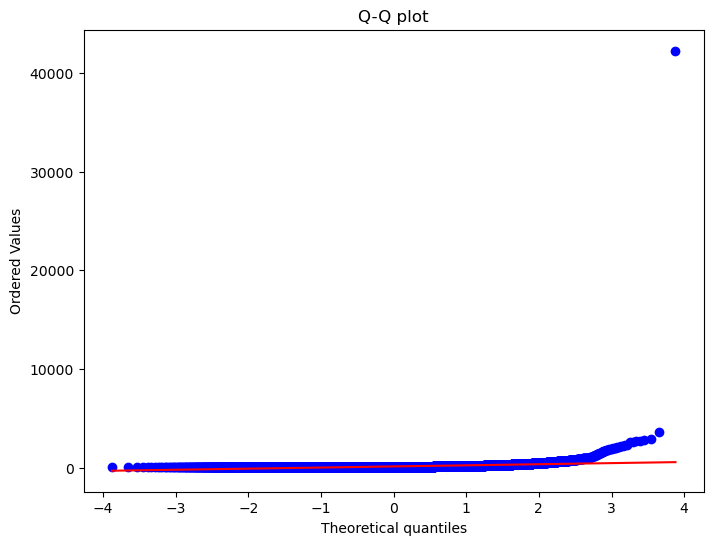

In [53]:
# Select a numerical column to test for normality
column_to_test = 'price'

# Shapiro-Wilk Test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df[column_to_test])
print("Shapiro-Wilk Test - Statistic:", shapiro_test_statistic, "p-value:", shapiro_p_value)

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df[column_to_test], dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

- We can se the graph and p value as this data is not normally distributed

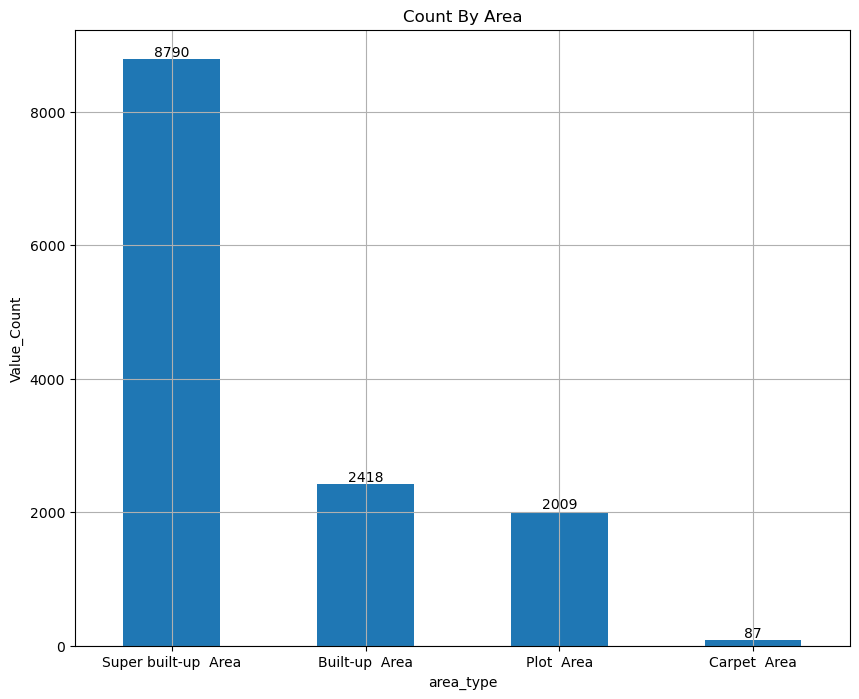

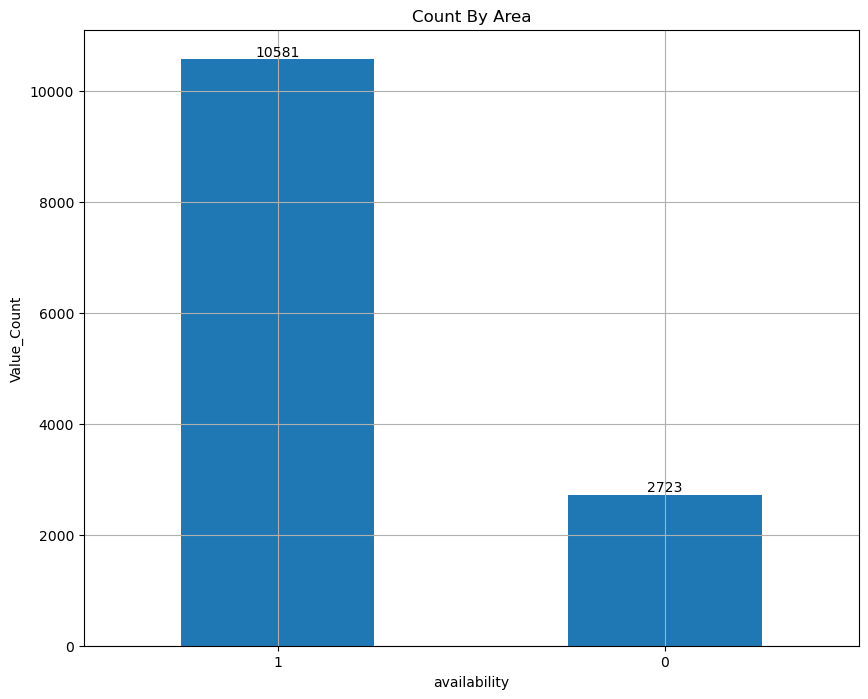

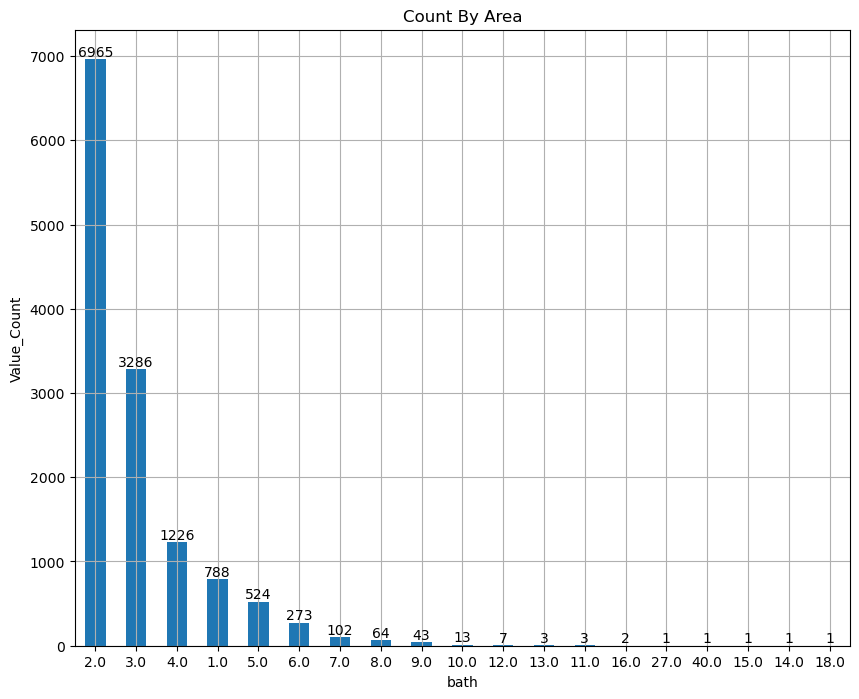

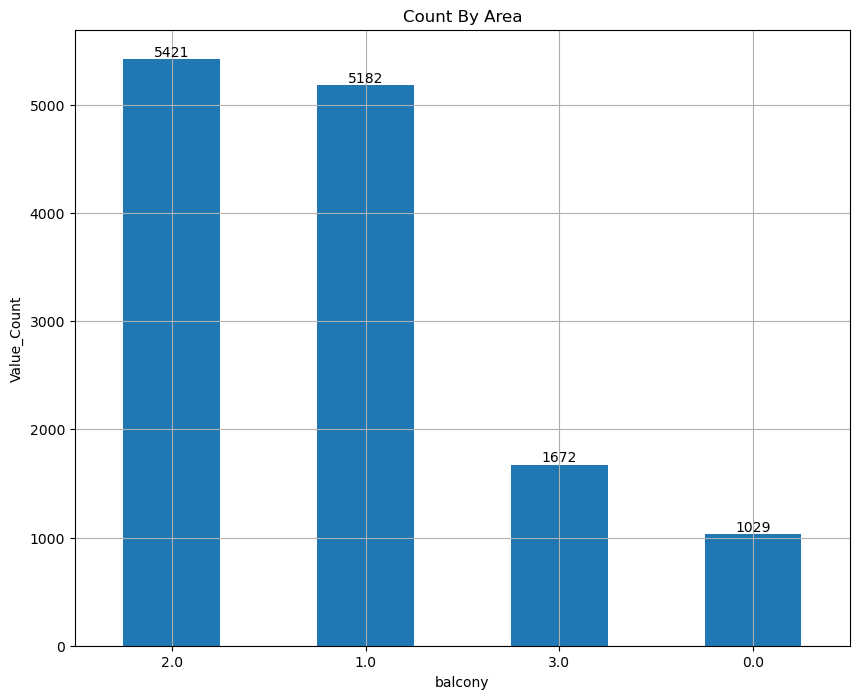

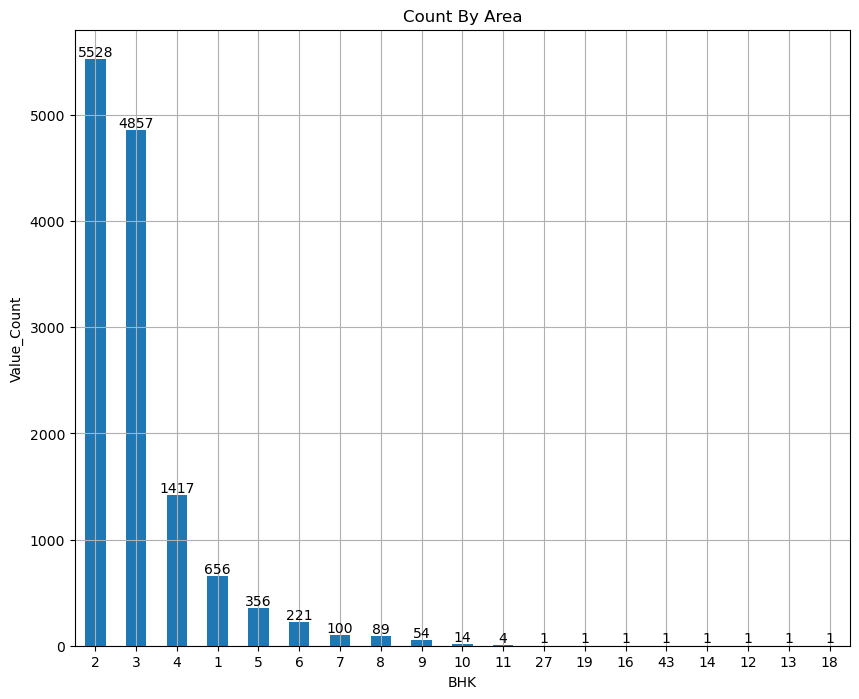

In [54]:
columns1 = ['area_type', 'availability','bath','balcony','BHK']

for i in columns1:
    df[i].value_counts().plot.bar(figsize=(10,8), title='Count By Area')
    plt.xlabel(f'{i}')
    plt.ylabel('Value_Count')
    plt.xticks(rotation=0)

    for index, value in enumerate(df[i].value_counts()):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    plt.grid()
    plt.show()

# Checking outliers

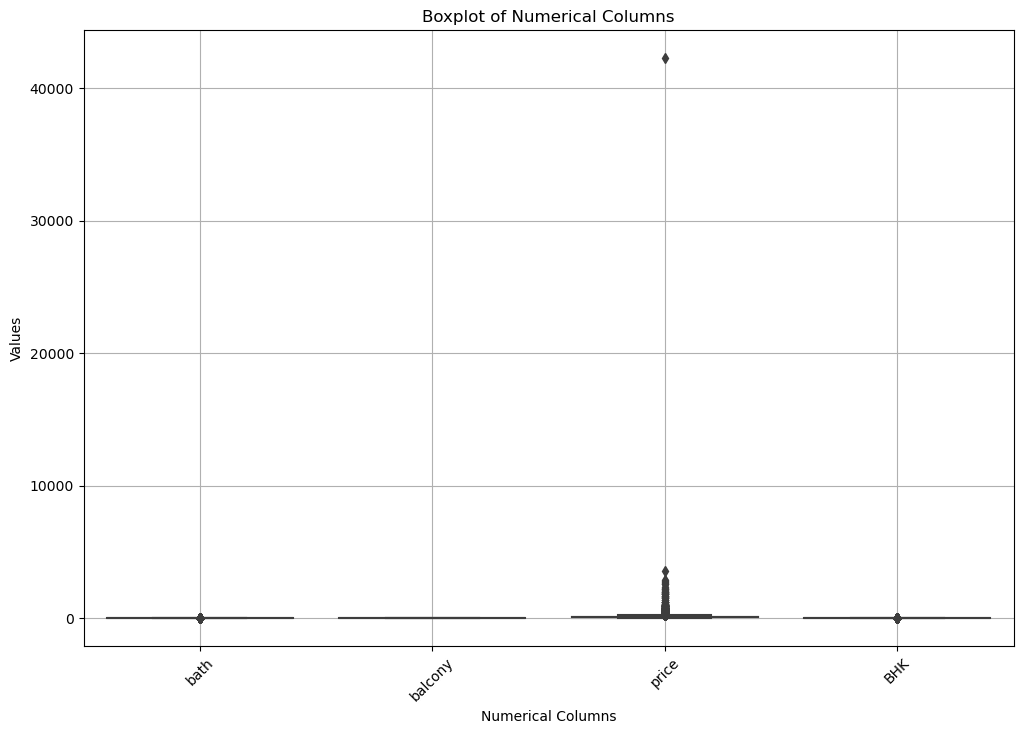

In [55]:
# Create a boxplot for each numerical column
numerical_columns = ['bath', 'balcony', 'price', 'BHK']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.grid()
plt.show()

- Clearly we can see an outlier in price so we need to remove this

In [56]:
# Remove outliers from the DataFrame
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows that are not outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from the 'price' variable
df1 = remove_outliers(df, 'price')
print("DataFrame after removing outliers:")
df1

DataFrame after removing outliers:


,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
0,Super built-up Area,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,369.98
1,Plot Area,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,461.54
2,Built-up Area,1,Uttarahalli,1440.0,2.0,3.0,62.00,3,430.56
3,Super built-up Area,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,624.59
4,Super built-up Area,1,Kothanur,1200.0,2.0,1.0,51.00,2,425.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,1,Bellandur,1262.0,2.0,2.0,47.00,2,372.42
13313,Super built-up Area,1,Uttarahalli,1345.0,2.0,1.0,57.00,3,423.79
13314,Super built-up Area,1,Green Glen Layout,1715.0,3.0,3.0,112.00,3,653.06
13317,Built-up Area,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,525.85


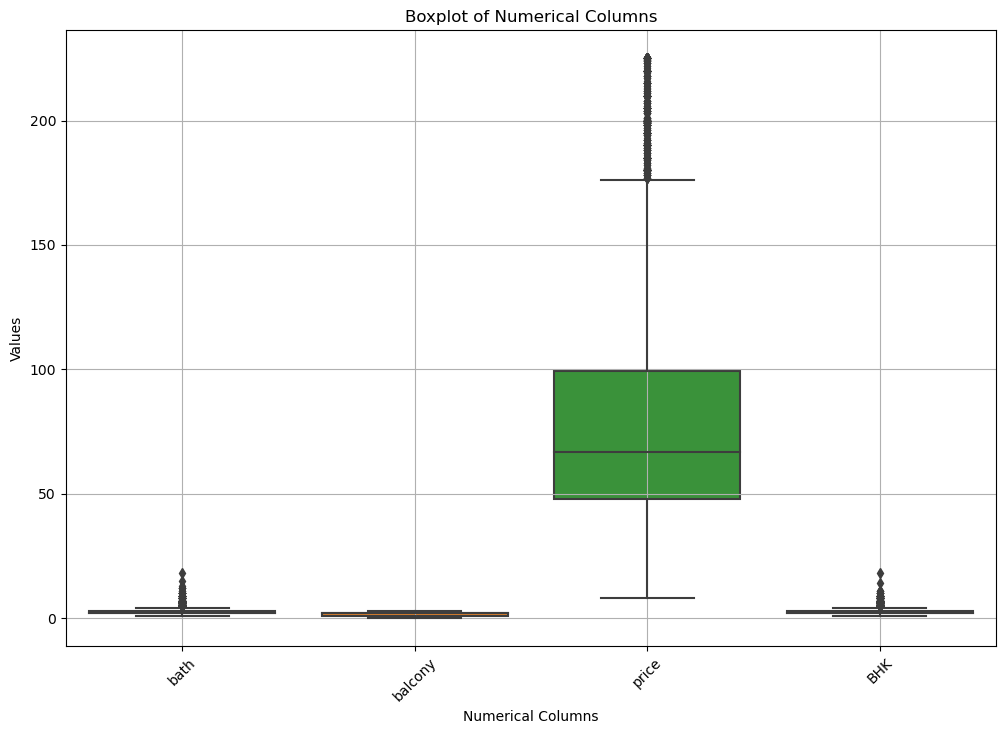

In [57]:
# Define numerical columns
numerical_columns = ['bath', 'balcony', 'price', 'BHK']

plt.figure(figsize=(12, 8))
# Use the DataFrame directly without double brackets
sns.boxplot(data=df1[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.grid()
plt.show()

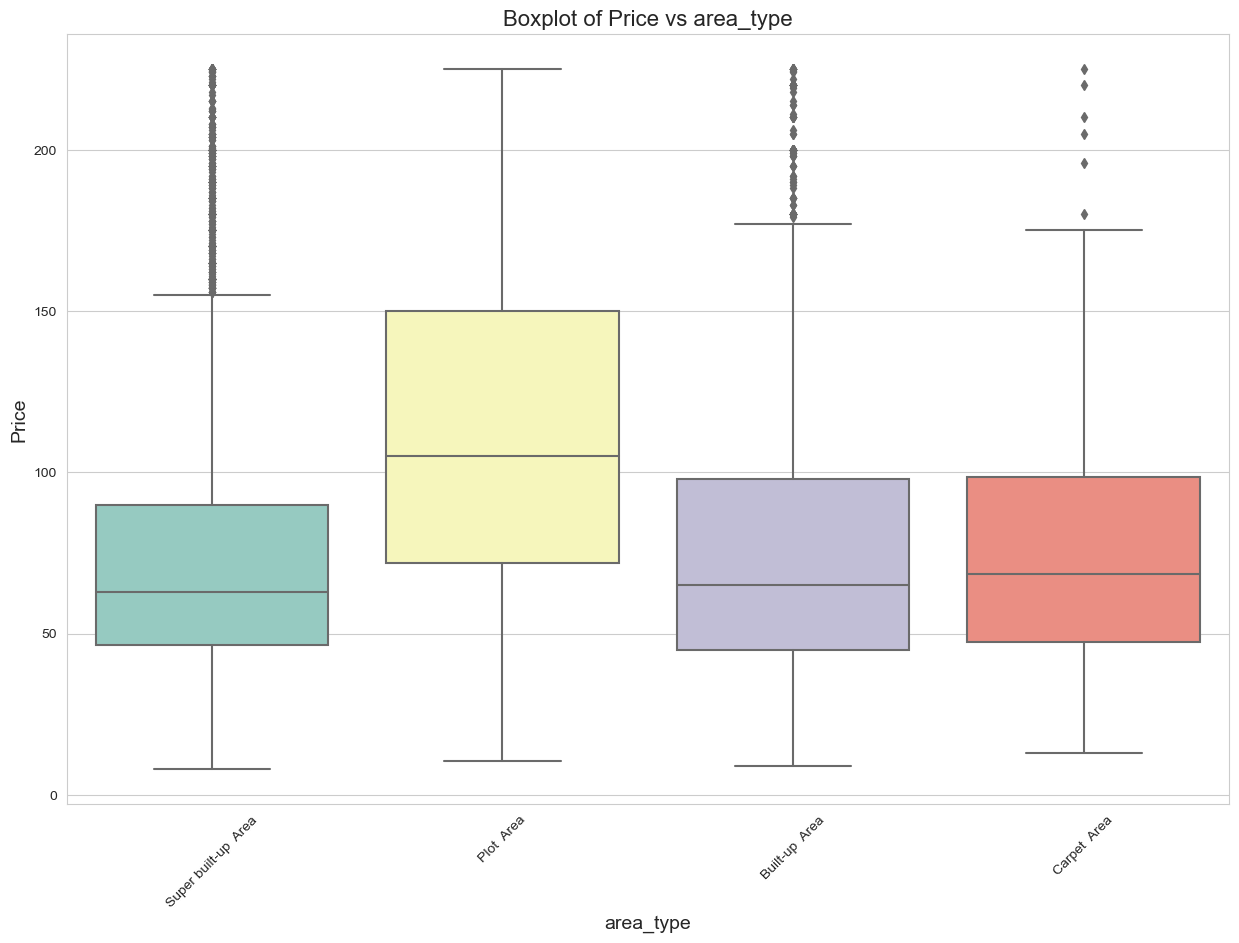

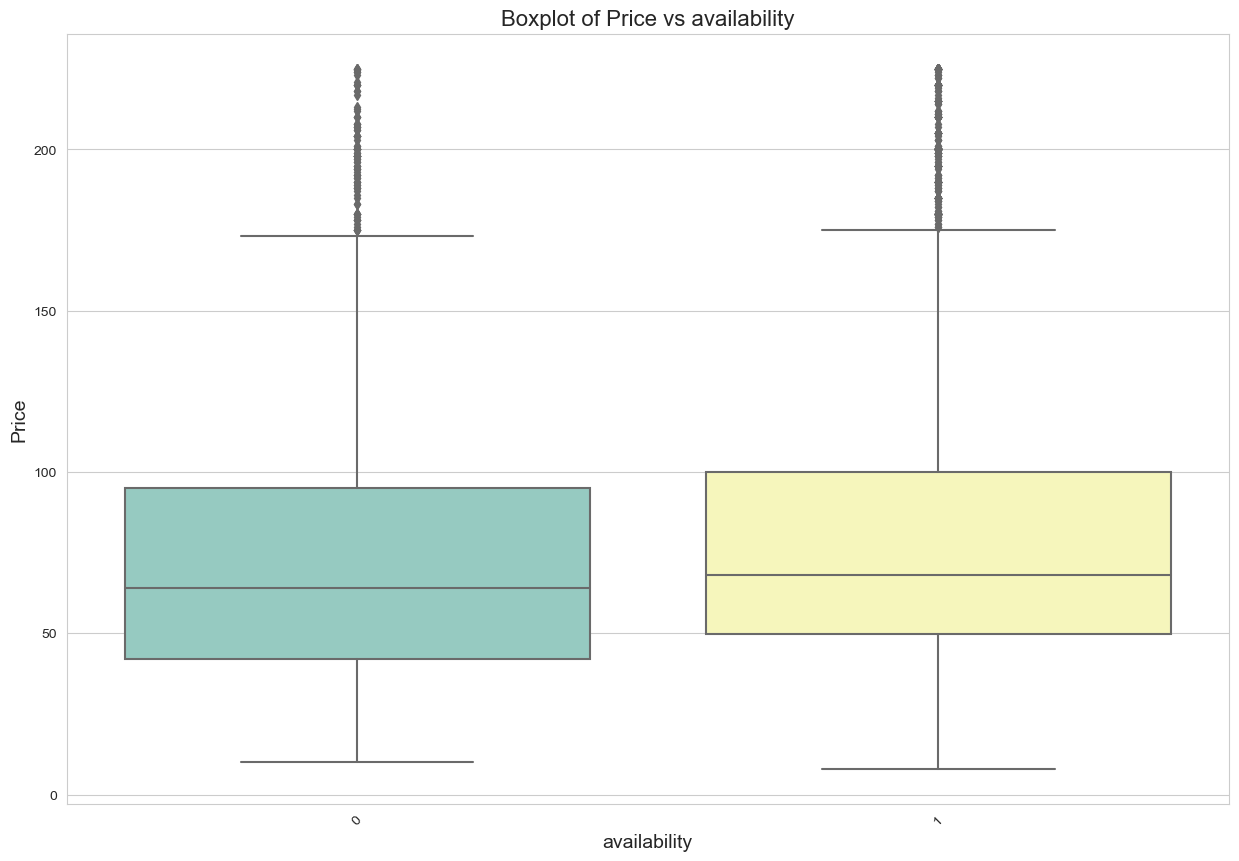

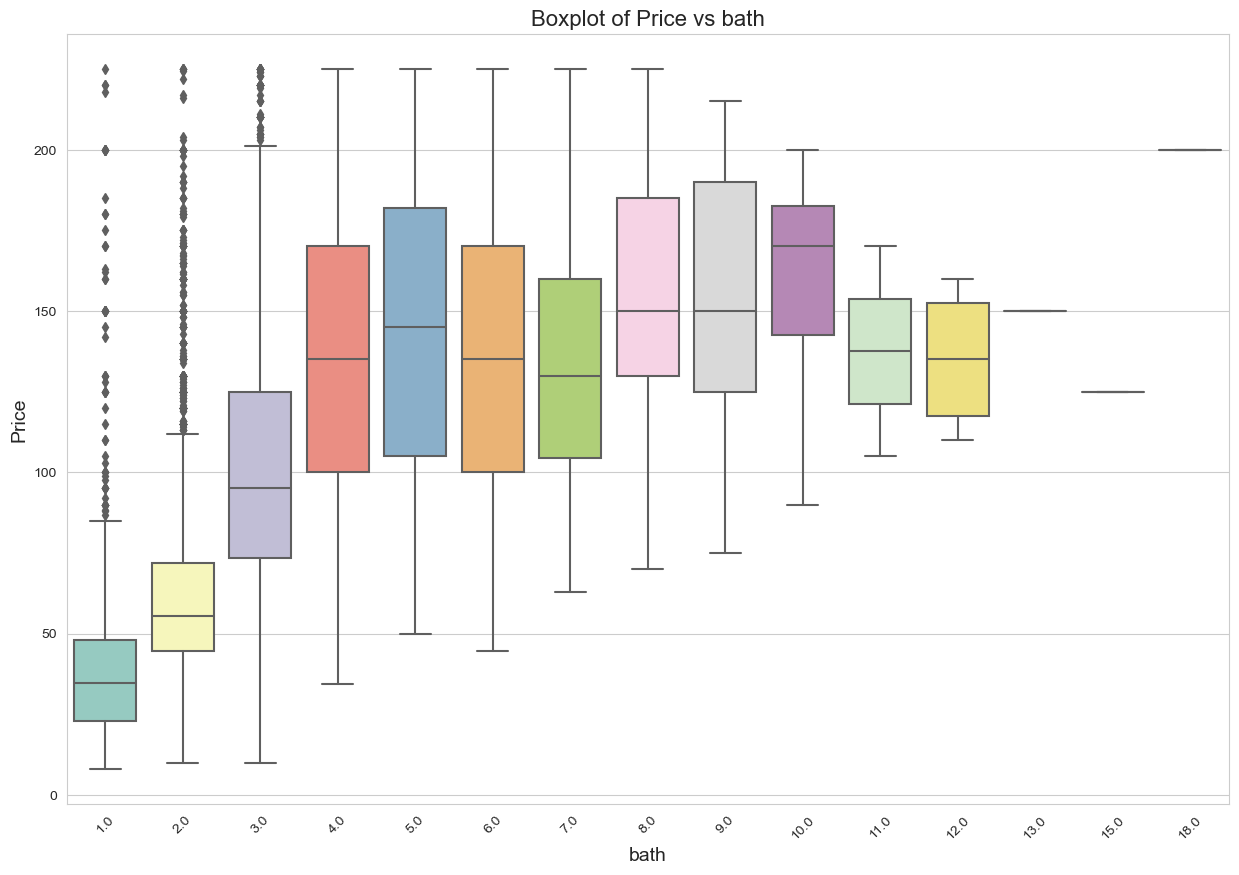

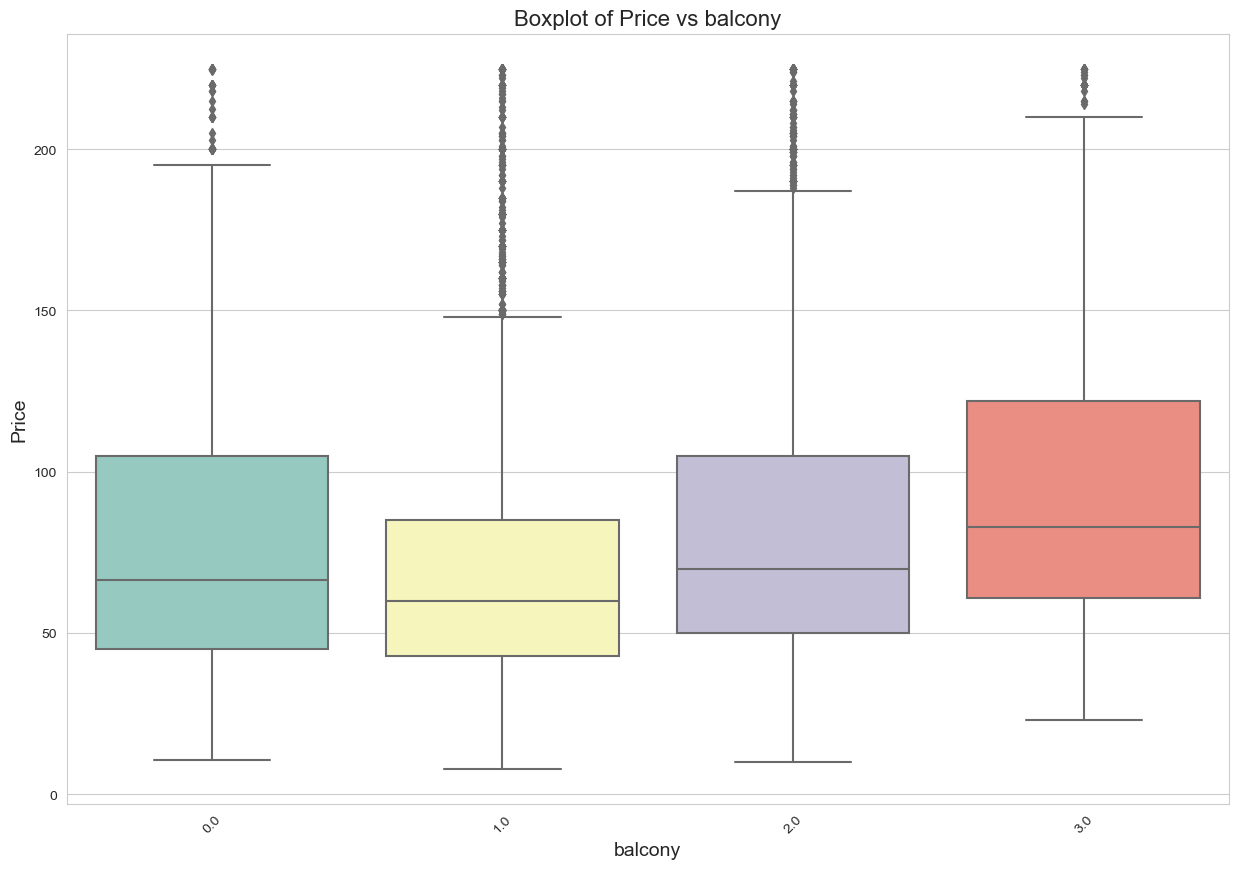

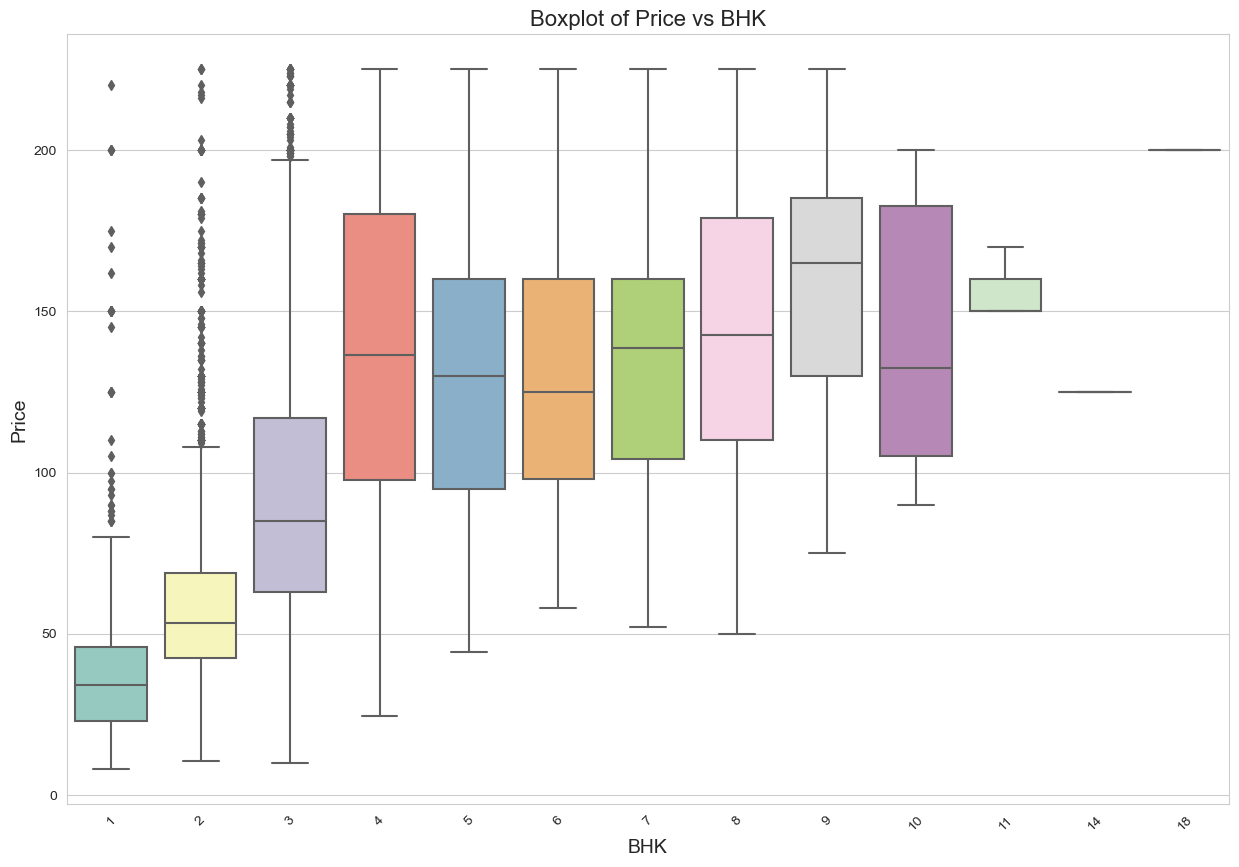

In [58]:
# checking outlier on 'price' with respect to the columns Using BoxPlot

sns.set_style("whitegrid")

# Loop through each column
for i in columns1:
    plt.figure(figsize=(15, 10))
    
    # Create the boxplot
    sns.boxplot(data=df1, x=i, y='price', palette="Set3")
    
    # Set labels and title
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.title(f'Boxplot of Price vs {i}', fontsize=16)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

--------------------------------------------------

--------------------------------------------------

- After some research found that normally Sq Ft per bedroom is 300 which means 2 BHK Apartment is minimum 600 Sqft. If for example 400 Sqft apartment with 2 BHK seems suspicious and can be removed as an outlier.
We will remove such outliers by keeping our minimum thresold per BHK to be 300 Sqft.

In [59]:
df1[df1['total_sqft'] / df1['BHK'] < 300]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
45,Plot Area,1,HSR Layout,600.0,9.0,1.0,200.0,8,3333.33
58,Plot Area,1,Murugeshpalya,1407.0,4.0,1.0,150.0,6,1066.10
68,Plot Area,1,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,629.63
70,Plot Area,1,Other,500.0,3.0,2.0,100.0,3,2000.00
78,Built-up Area,1,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,478.26
...,...,...,...,...,...,...,...,...,...
13221,Plot Area,1,Other,1178.0,9.0,1.0,75.0,9,636.67
13277,Plot Area,1,Other,1400.0,7.0,1.0,218.0,7,1557.14
13279,Plot Area,1,Other,1200.0,5.0,1.0,130.0,6,1083.33
13281,Plot Area,1,Margondanahalli,1375.0,5.0,1.0,125.0,5,909.09


- Form above data points, we can see 9 BHK apartments with 1178 Sqft. another one is 8 BHK in 600 Sqft, these are clear data errors that can be removed

In [60]:
df2 = df1[~(df1.total_sqft/df1.BHK < 300)]
df2.shape

(11373, 9)

In [61]:
df2.describe()

,availability,total_sqft,bath,balcony,price,BHK,Per_sqft_price
count,11373.000000,1.137300e+04,11373.000000,11373.000000,11373.000000,11373.000000,11373.000000
mean,0.778511,3.415639e+04,2.391366,1.567045,77.708208,2.515080,548.558494
std,0.415267,1.219862e+06,0.880627,0.787707,42.730927,0.844103,223.830707
min,0.000000,3.000000e+02,1.000000,0.000000,9.000000,1.000000,0.010000
25%,1.000000,1.100000e+03,2.000000,1.000000,47.000000,2.000000,405.000000
50%,1.000000,1.255000e+03,2.000000,2.000000,65.000000,2.000000,503.710000
75%,1.000000,1.590000e+03,3.000000,2.000000,95.000000,3.000000,635.640000
max,1.000000,4.599936e+07,12.000000,3.000000,225.000000,11.000000,4400.000000


- Checking if for a given location how does the 2 BHK and 3 BHK property prices look like

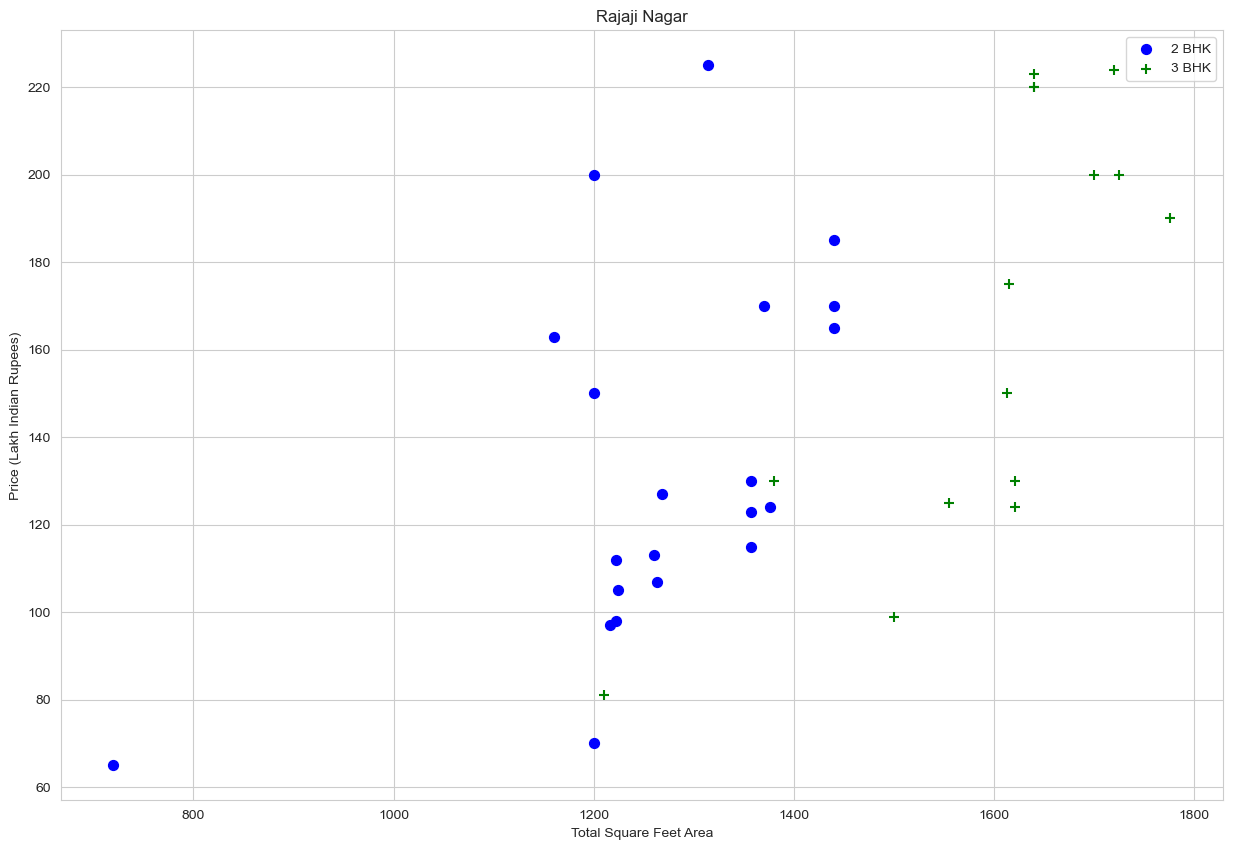

In [62]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,"Rajaji Nagar")

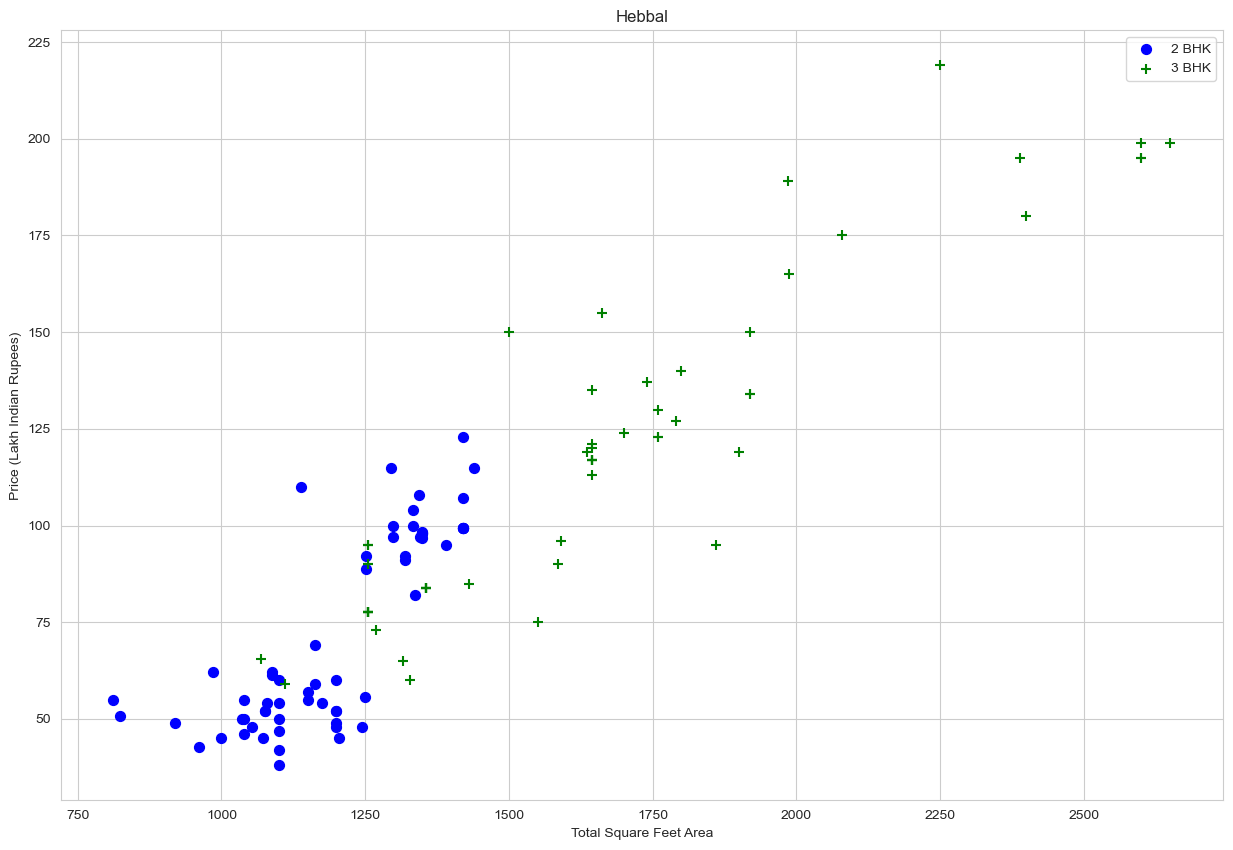

In [63]:
plot_scatter_chart(df2,"Hebbal")

- We should also remove properties where for the same location, the price of for example a 3 BHK appartment is less than a 2 BHK apartment with the same sqft area.

In [64]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_sqft_price),
                'std': np.std(bhk_df.Per_sqft_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_sqft_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df3 = remove_bhk_outliers(df2)
df3.shape

(7975, 9)

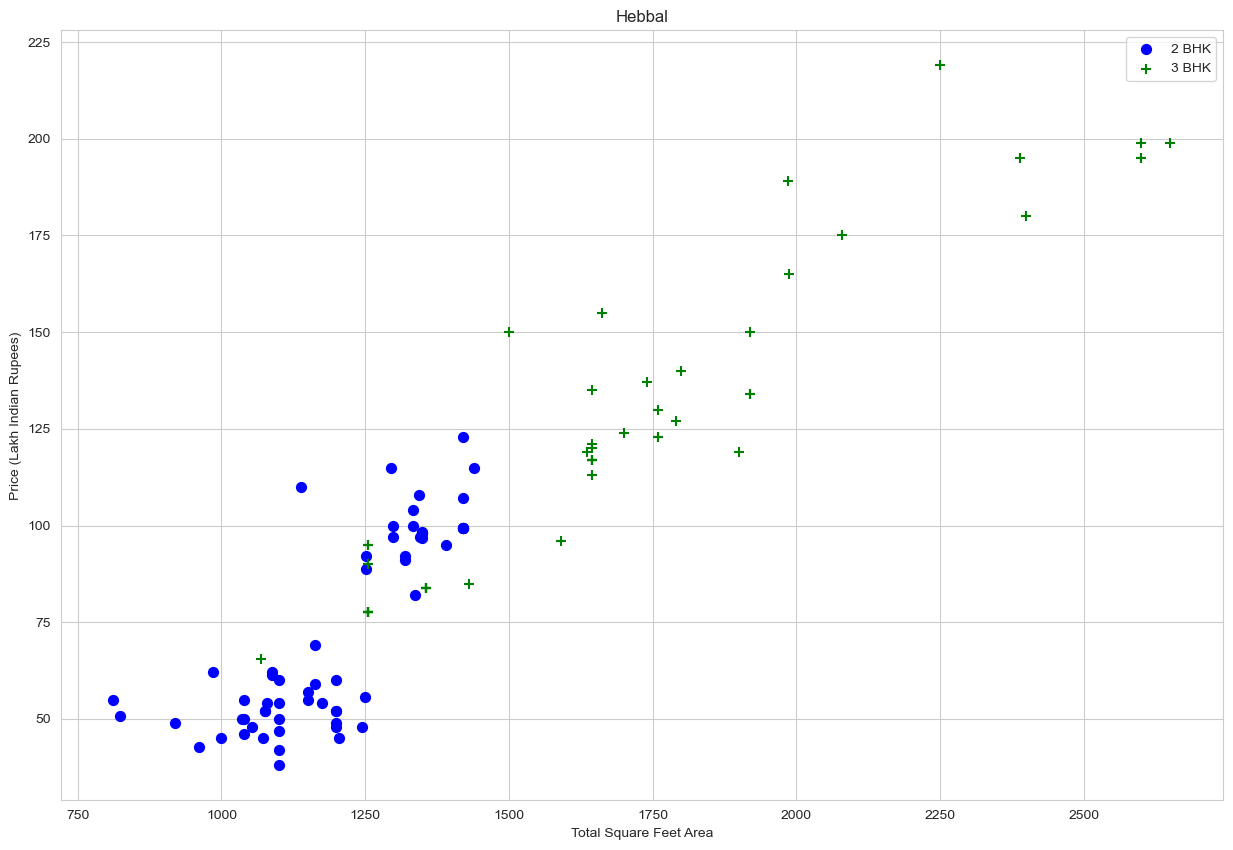

In [65]:
plot_scatter_chart(df3,"Hebbal")

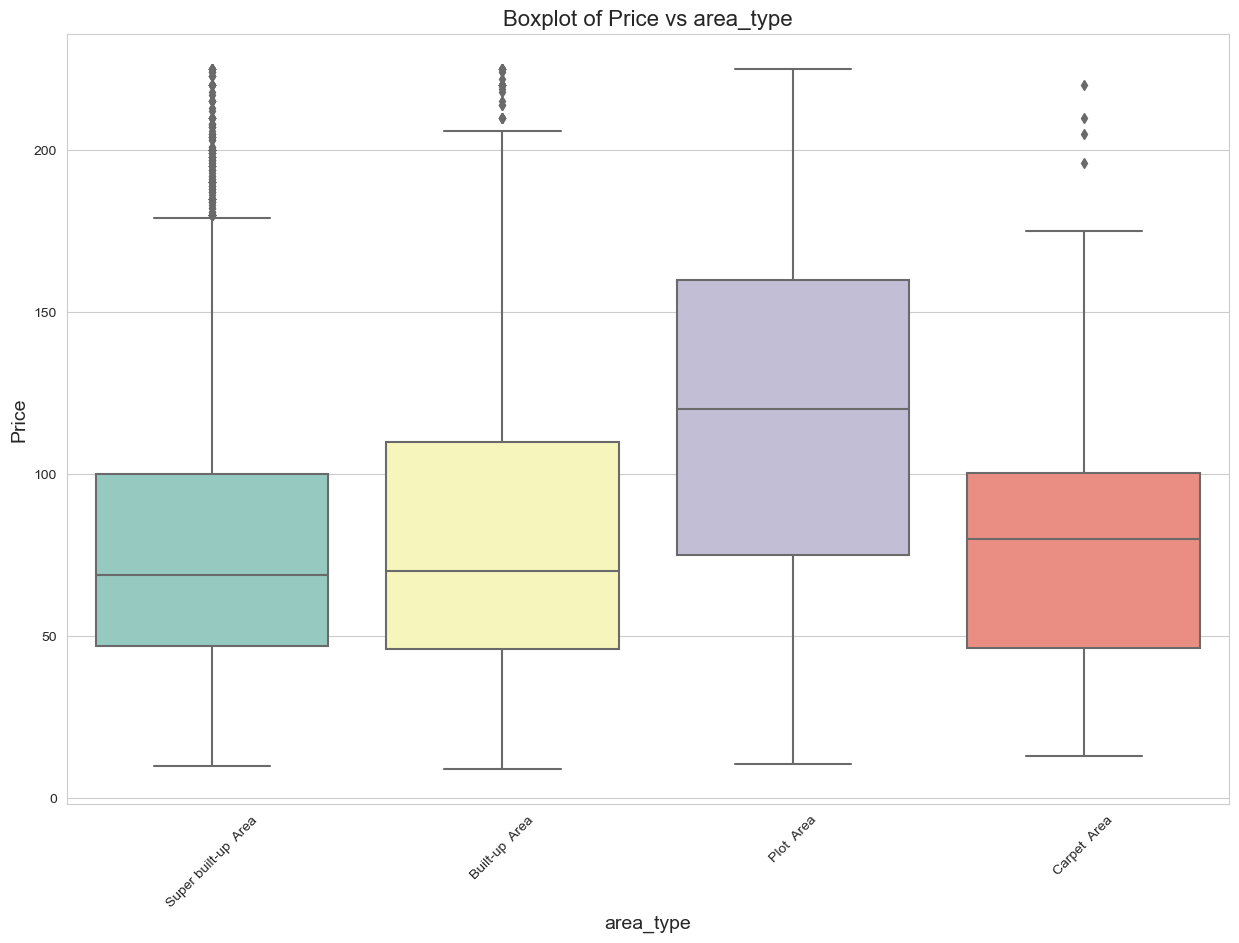

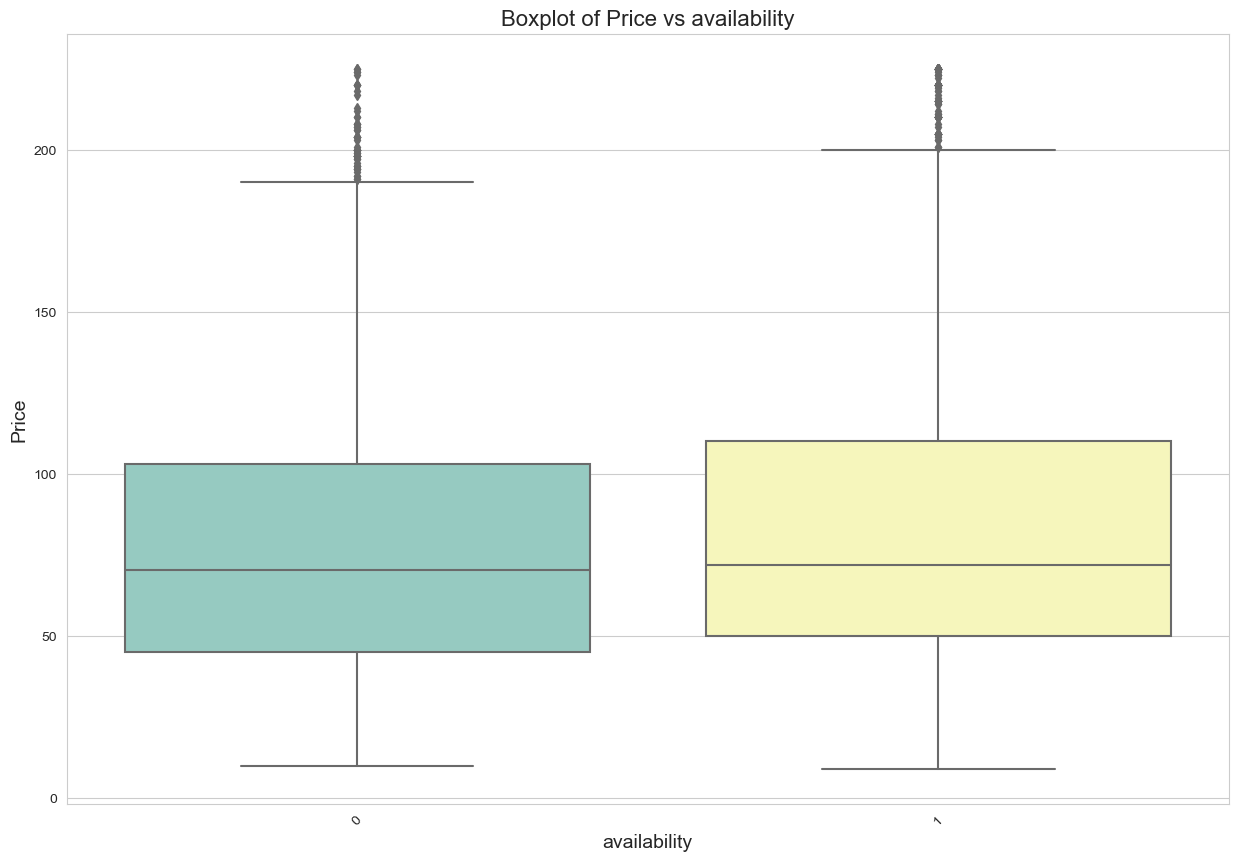

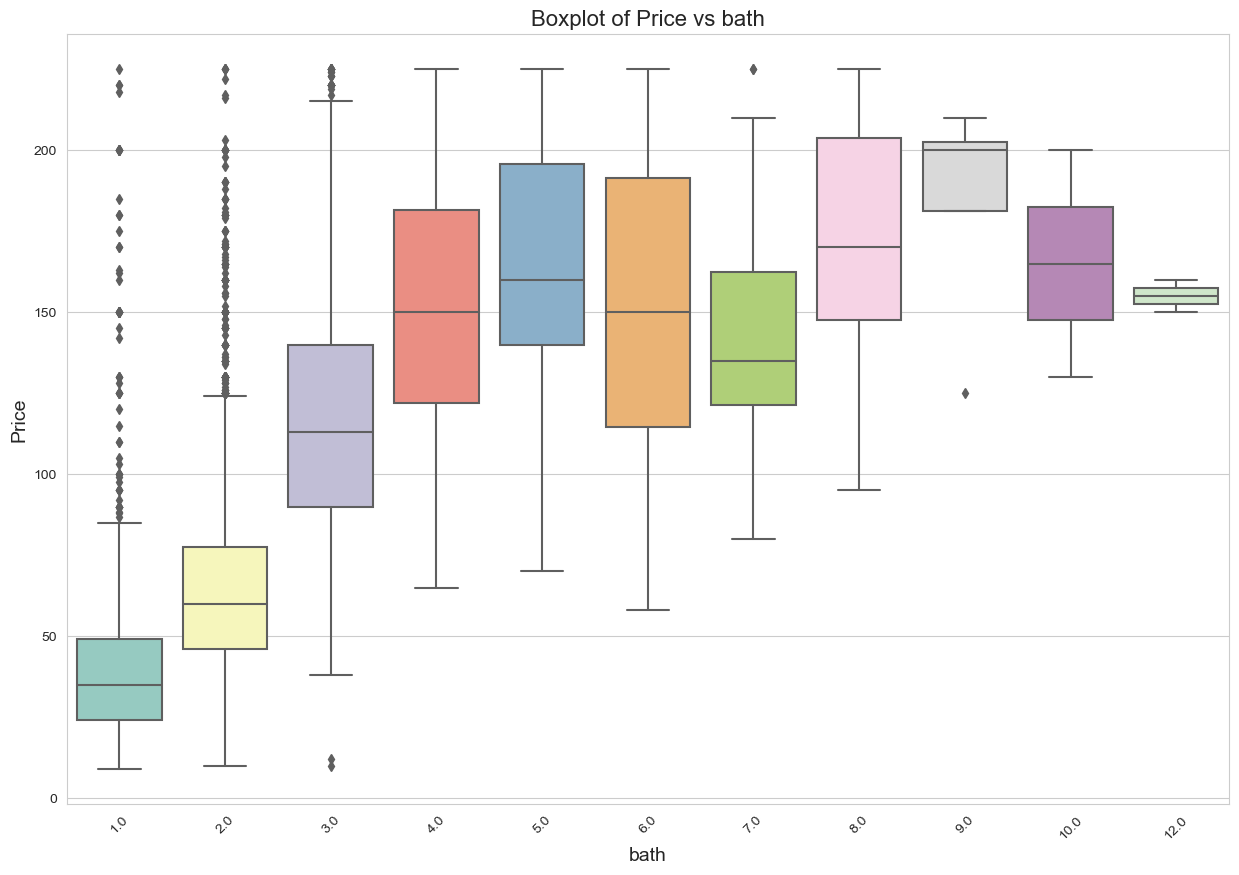

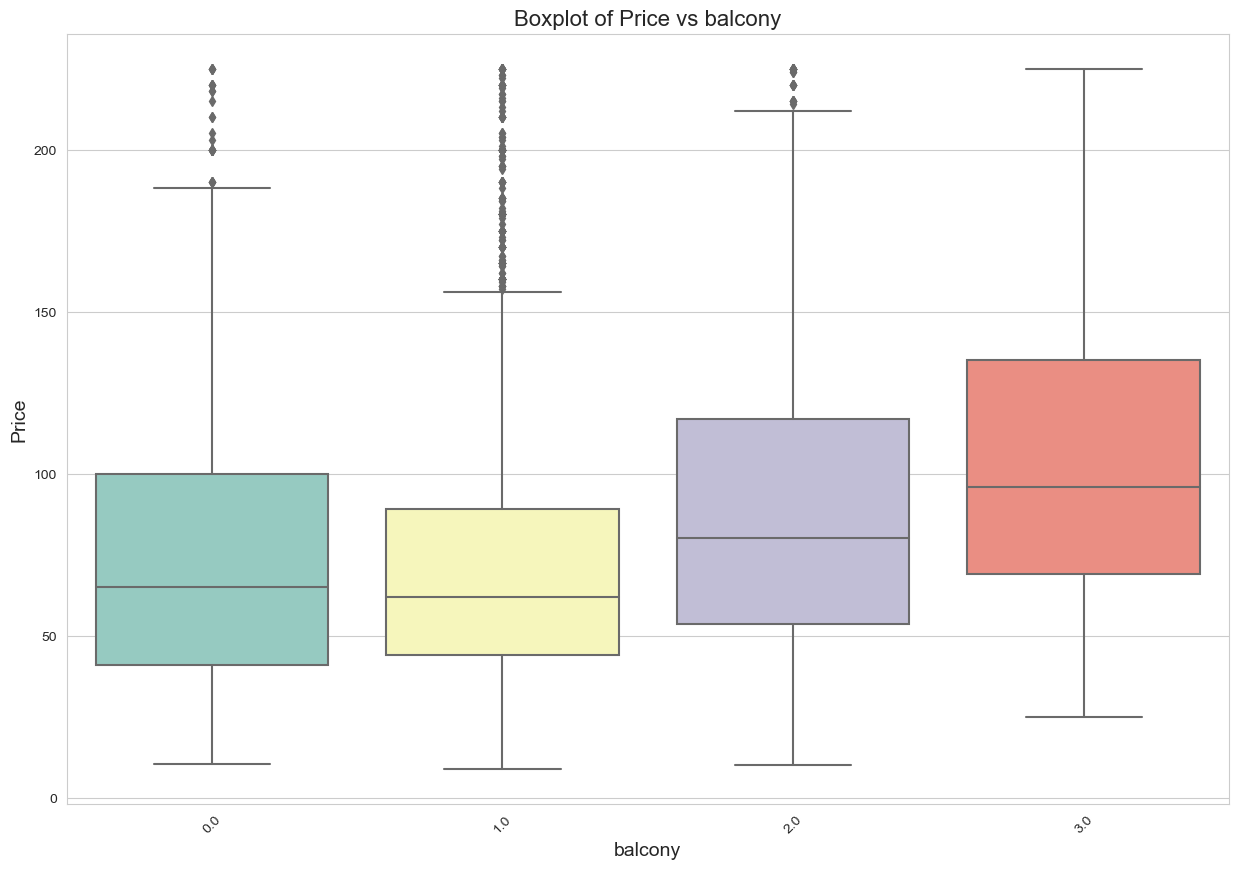

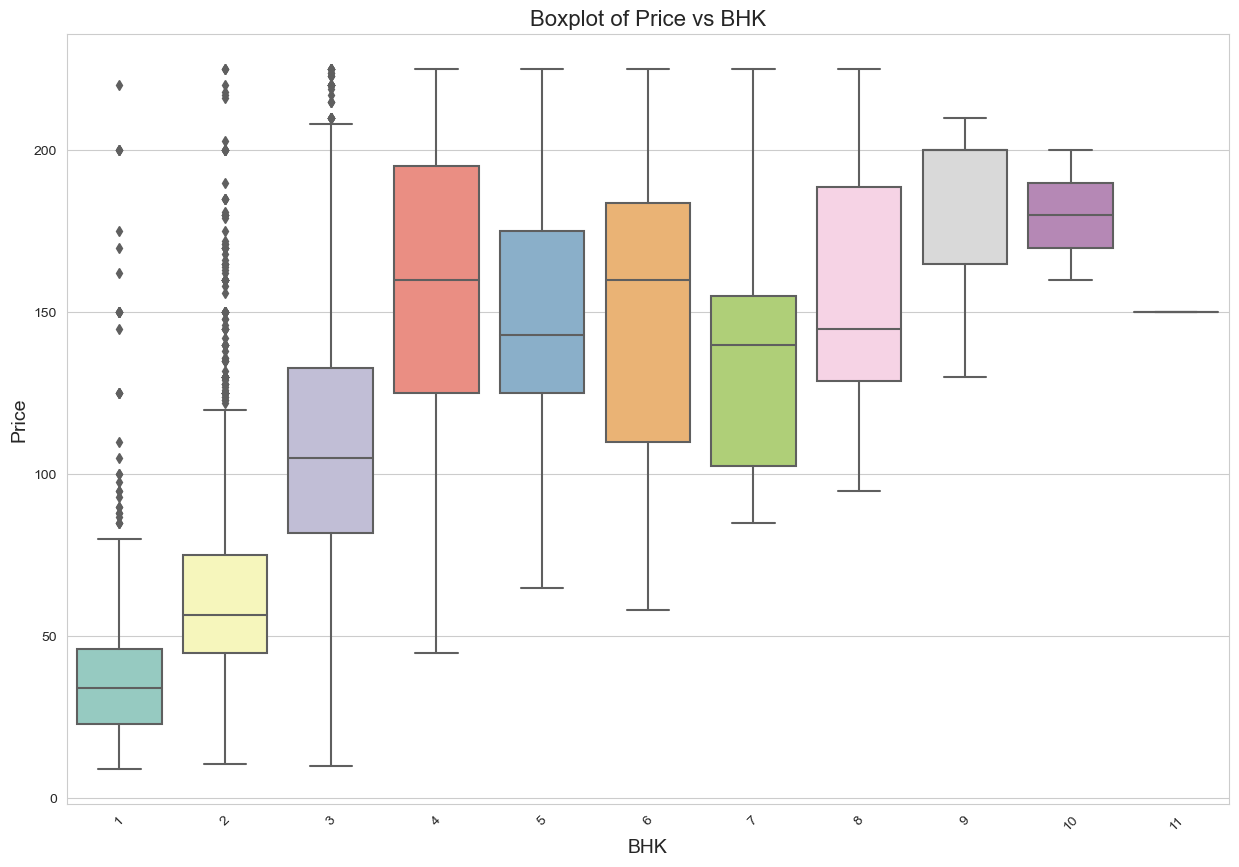

In [66]:
# checking outlier on 'price' with respect to the columns Using BoxPlot

sns.set_style("whitegrid")

# Loop through each column
for i in columns1:
    plt.figure(figsize=(15, 10))
    
    # Create the boxplot
    sns.boxplot(data=df3, x=i, y='price', palette="Set3")
    
    # Set labels and title
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.title(f'Boxplot of Price vs {i}', fontsize=16)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

Based on the above charts we can see the outliers are being removed due to REMOVE_BHK_OUTLIERS Function

# Outlier Removal using bathroom feature

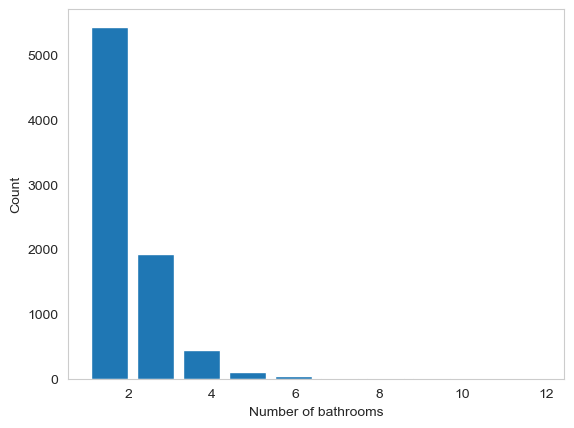

In [67]:
plt.hist(df3.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.grid()
plt.show()

In [68]:
df3[df3.bath > 10]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
7979,Super built-up Area,1,Other,6000.0,12.0,2.0,150.0,11,250.0
8636,Super built-up Area,1,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,400.0


It is unusal to have 2 more bathrooms than number of bedrooms in a house

In [69]:
df3[df3.bath > df3.BHK + 2]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
7709,Built-up Area,1,Chikkabanavar,2460.0,7.0,2.0,80.0,4,325.2
12103,Super built-up Area,1,Thanisandra,1806.0,6.0,2.0,116.0,3,642.3


In [70]:
df4 = df3[df3.bath < df3.BHK + 2]
df4

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
0,Super built-up Area,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,369.98
2,Built-up Area,1,Uttarahalli,1440.0,2.0,3.0,62.00,3,430.56
3,Super built-up Area,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,624.59
4,Super built-up Area,1,Kothanur,1200.0,2.0,1.0,51.00,2,425.00
6,Super built-up Area,0,Old Airport Road,2732.0,4.0,2.0,204.00,4,746.71
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,1,Bellandur,1262.0,2.0,2.0,47.00,2,372.42
13313,Super built-up Area,1,Uttarahalli,1345.0,2.0,1.0,57.00,3,423.79
13314,Super built-up Area,1,Green Glen Layout,1715.0,3.0,3.0,112.00,3,653.06
13317,Built-up Area,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,525.85


In [71]:
df4.describe()

,availability,total_sqft,bath,balcony,price,BHK,Per_sqft_price
count,7941.000000,7.941000e+03,7941.000000,7941.00000,7941.000000,7941.000000,7941.000000
mean,0.776854,2.499827e+04,2.337867,1.51870,82.682146,2.417832,599.457862
std,0.416381,1.032627e+06,0.863222,0.77317,45.056128,0.858770,239.965582
min,0.000000,3.000000e+02,1.000000,0.00000,9.000000,1.000000,0.020000
25%,1.000000,1.076000e+03,2.000000,1.00000,48.500000,2.000000,444.260000
50%,1.000000,1.230000e+03,2.000000,1.00000,71.000000,2.000000,564.580000
75%,1.000000,1.566000e+03,3.000000,2.00000,106.000000,3.000000,689.660000
max,1.000000,4.599936e+07,12.000000,3.00000,225.000000,11.000000,4400.000000


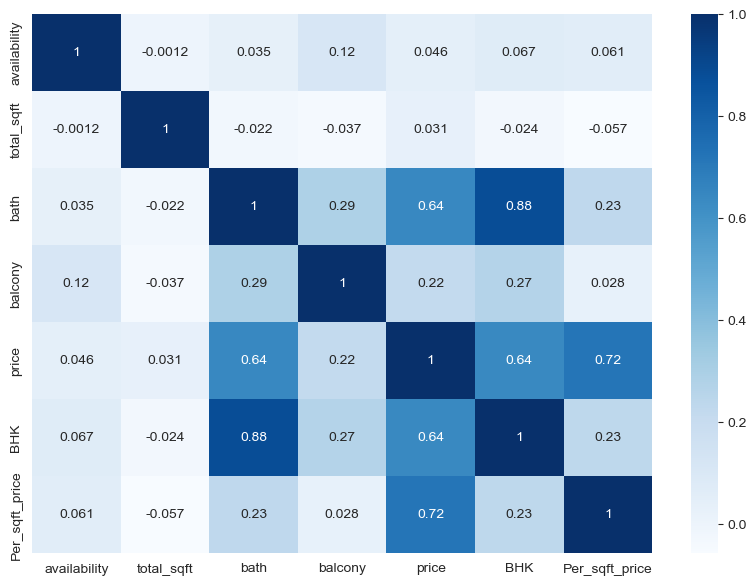

In [72]:
plt.figure(figsize=(10,7))
sns.heatmap(df4.corr(),annot=True,cmap='Blues')
plt.show()

# Applying "one hot encoding" on all the categorical columns

In [77]:
df4.dtypes

area_type          object
availability        int64
location           object
total_sqft        float64
bath              float64
balcony           float64
price             float64
BHK                 int64
Per_sqft_price    float64
dtype: object

In [73]:
df6 = pd.get_dummies(df4)

In [75]:
df6

,availability,total_sqft,bath,balcony,price,BHK,Per_sqft_price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,0,1056.0,2.0,1.0,39.07,2,369.98,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1440.0,2.0,3.0,62.00,3,430.56,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1521.0,3.0,1.0,95.00,3,624.59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1200.0,2.0,1.0,51.00,2,425.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2732.0,4.0,2.0,204.00,4,746.71,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,1,1262.0,2.0,2.0,47.00,2,372.42,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13313,1,1345.0,2.0,1.0,57.00,3,423.79,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1,1715.0,3.0,3.0,112.00,3,653.06,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1,1141.0,2.0,1.0,60.00,2,525.85,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df6.dtypes

availability                     int64
total_sqft                     float64
bath                           float64
balcony                        float64
price                          float64
                                ...   
location_Yelachenahalli          uint8
location_Yelahanka               uint8
location_Yelahanka New Town      uint8
location_Yelenahalli             uint8
location_Yeshwanthpur            uint8
Length: 252, dtype: object

# Scaling Total Sqft, Price column feature and Per_sqft_price

In [171]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Specify which columns to scale
# columns_to_scale = ['total_sqft', 'price'] 
columns_to_scale = ['total_sqft', 'price', 'Per_sqft_price'] 

# Apply the Min-Max scaling to the specified columns
df6[columns_to_scale] = scaler.fit_transform(df6[columns_to_scale])

df6

,availability,total_sqft,bath,balcony,price,BHK,Per_sqft_price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,0,-0.023187,2.0,1.0,-0.968012,2,-0.956355,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.022815,2.0,3.0,-0.459060,3,-0.703886,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-0.022737,3.0,1.0,0.273406,3,0.104739,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.023048,2.0,1.0,-0.703215,2,-0.727058,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,-0.021564,4.0,2.0,2.692763,4,0.613677,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,1,-0.022988,2.0,2.0,-0.791999,2,-0.946186,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13313,1,-0.022907,2.0,1.0,-0.570039,3,-0.732101,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1,-0.022549,3.0,3.0,0.650737,3,0.223388,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1,-0.023105,2.0,1.0,-0.503451,2,-0.306763,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df6.shape

(7941, 252)

# Model Building

- Linear Regression: A simple and interpretable model that models the relationship between the independent variables (features) and the dependent variable (house price) linearly.

- Decision Tree Regression: Decision trees can capture nonlinear relationships and interactions between features. They partition the feature space into regions and predict the average target value in each region.

- Random Forest Regression: Random forests are an ensemble learning technique that combines multiple decision trees. They provide higher accuracy and better generalization by reducing overfitting compared to a single decision tree.

- Gradient Boosting Regression (e.g., GradientBoostingRegressor): Gradient boosting builds a sequence of trees where each tree corrects the errors of the previous one. It typically performs well and is robust against overfitting.


In [173]:
X = df6.drop(columns='price')  
y = df6['price'] 

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [175]:
from sklearn.linear_model import LinearRegression

# Initializing the linear regression model
lr=LinearRegression()

# Training the model
lr.fit(X_train,y_train)

# Makeing predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculating RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculating R2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("RMSE for train:", train_rmse)
print("RMSE for test:", test_rmse)
print("R2 score for train:", train_r2)
print("R2 score for test:", test_r2)

RMSE for train: 0.44144882484690934
RMSE for test: 0.42963556096425204
R2 score for train: 0.8067985227436721
R2 score for test: 0.8084945634261006


# Decision Tree Regression Model

In [176]:
from sklearn.tree import DecisionTreeRegressor

# Initializing the decision tree regression model
dtr = DecisionTreeRegressor()

# Training the model
dtr.fit(X_train, y_train)

# Makeing predictions
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

# Calculating RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculating R2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("RMSE for train:", train_rmse)
print("RMSE for test:", test_rmse)
print("R2 score for train:", train_r2)
print("R2 score for test:", test_r2)

RMSE for train: 5.412031365766144e-17
RMSE for test: 0.13343364999375618
R2 score for train: 1.0
R2 score for test: 0.9815281072626729


- Here we can see our model it overfitted to training so we need to fix this

# Hyperparamater Tuning for Decision Tree  

In [177]:
from sklearn.model_selection import GridSearchCV

# Initialize the decision tree regression model
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters and their values to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("RMSE for train:", train_rmse)
print("RMSE for test:", test_rmse)
print("R2 score for train:", train_r2)
print("R2 score for test:", test_r2)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
RMSE for train: 0.02983563079270639
RMSE for test: 0.12807032224032766
R2 score for train: 0.9991174889312028
R2 score for test: 0.9829832087803597


- We define a parameter grid containing different values for the hyperparameters max_depth, min_samples_split, and min_samples_leaf.
- We perform a Grid Search using GridSearchCV, which exhaustively searches through all combinations of hyperparameters and cross-validates the model with 5 folds.
- The scoring parameter is set to 'neg_mean_squared_error' to optimize the mean squared error (MSE).
- After fitting the Grid Search object, we obtain the best model and its hyperparameters using best_estimator_.
- We make predictions using the best model and evaluate its performance using RMSE and R2 scores on both the training and testing datasets.

# Random Forest Regression Model

In [178]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regression model
rfr = RandomForestRegressor(random_state=42)

# Train the model
rfr.fit(X_train, y_train)

# Make predictions
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("RMSE for train:", train_rmse)
print("RMSE for test:", test_rmse)
print("R2 score for train:", train_r2)
print("R2 score for test:", test_r2)

RMSE for train: 0.02965998535936505
RMSE for test: 0.09898853596257493
R2 score for train: 0.9991278492123771
R2 score for test: 0.9898339915075121


# Gradient Boosting Regression Model

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting regression model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("RMSE for train:", train_rmse)
print("RMSE for test:", test_rmse)
print("R2 score for train:", train_r2)
print("R2 score for test:", test_r2)



RMSE for train: 0.06386790123723401
RMSE for test: 0.08698534814473254
R2 score for train: 0.9959559640953716
R2 score for test: 0.9921499417751362


# Comparing all models

In [180]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# X = df6.drop(columns='price')  
# y = df6['price'] 

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models = {
#     'Linear Regression': LinearRegression(),
#     'Decision Tree Regression': DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=5, random_state=42),
#     'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
#     'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# }

# best_model = None
# best_rmse = float('inf')
# best_r2 = float('-inf')

# # Train and evaluate models
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred = model.predict(X_test)
    
#     # Calculate RMSE
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
    
#     # Calculate R2 score
#     r2 = r2_score(y_test, y_pred)
    
#     print(f"{name} - RMSE: {rmse}, R2 Score: {r2}")
    
#     # Update best model based on RMSE
#     if rmse < best_rmse:
#         best_rmse = rmse
#         best_model = model
    
#     # Update best model based on R2 score
#     if r2 > best_r2:
#         best_r2 = r2

# print(f"\nBest Model based on RMSE: {type(best_model).__name__} with RMSE: {best_rmse}")
# print(f"Best Model based on R2 Score: {type(best_model).__name__} with R2 Score: {best_r2}")

-------------------------------------------------------------